# Import libraries:

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/newcarsalesnorway/norway_new_car_sales_by_month.csv
/kaggle/input/newcarsalesnorway/norway_new_car_sales_by_model.csv
/kaggle/input/newcarsalesnorway/norway_new_car_sales_by_make.csv


In [ ]:
import scipy.stats
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import StandardScaler

In [ ]:
import plotly.express as px

In [4]:
!pip install nb_black -q

In [5]:
!pip install prophet

In [6]:
%load_ext nb_black

<IPython.core.display.Javascript object>

# Data analysis:

In [7]:
df_month = pd.read_csv('/kaggle/input/newcarsalesnorway/norway_new_car_sales_by_month.csv')

df_make = pd.read_csv('/kaggle/input/newcarsalesnorway/norway_new_car_sales_by_make.csv')

<IPython.core.display.Javascript object>

## Monthly sales

In [8]:
df_month.head(5)

,Year,Month,Quantity,Quantity_YoY,Import,Import_YoY,Used,Used_YoY,Avg_CO2,Bensin_Co2,Diesel_Co2,Quantity_Diesel,Diesel_Share,Diesel_Share_LY,Quantity_Hybrid,Quantity_Electric,Import_Electric
0,2007,1,12685,5227,2276,257,NaN,NaN,152,155,152,10072,79.4,52.5,NaN,NaN,NaN
1,2007,2,9793,2448,1992,-89,NaN,NaN,156,159,155,7222,73.7,47.4,NaN,NaN,NaN
2,2007,3,11264,1445,2626,45,NaN,NaN,159,161,158,7965,70.7,48.1,NaN,NaN,NaN
3,2007,4,8854,504,2220,-130,NaN,NaN,160,165,158,6116,69.1,48.4,NaN,NaN,NaN
4,2007,5,12007,1592,2881,7,NaN,NaN,160,163,159,8519,71.0,49.1,NaN,NaN,NaN


<IPython.core.display.Javascript object>

In [9]:
df_month.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,121.0,2011.545455,2.915476,2007.0,2009.0,2012.0,2014.0,2017.0
Month,121.0,6.454545,3.488075,1.0,3.0,6.0,9.0,12.0
Quantity,121.0,11134.297521,1752.046397,5353.0,10250.0,11385.0,12337.0,14207.0
Quantity_YoY,121.0,392.586777,1789.539953,-4548.0,-526.0,493.0,1445.0,5227.0
Import,121.0,2204.371901,573.127896,1048.0,1812.0,2263.0,2625.0,3768.0
Import_YoY,121.0,-135.049587,545.395787,-1810.0,-495.0,-114.0,162.0,1334.0
Used,61.0,36864.737705,4230.548664,24106.0,34212.0,37079.0,39797.0,44106.0
Used_YoY,49.0,973.122449,2728.915662,-6261.0,-392.0,855.0,2708.0,5896.0
Avg_CO2,121.0,129.520661,22.719338,84.0,110.0,132.0,151.0,162.0
Bensin_Co2,121.0,133.735537,17.094233,94.0,120.0,131.0,150.0,165.0


<IPython.core.display.Javascript object>

In [10]:
df_month.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               121 non-null    int64  
 1   Month              121 non-null    int64  
 2   Quantity           121 non-null    int64  
 3   Quantity_YoY       121 non-null    int64  
 4   Import             121 non-null    int64  
 5   Import_YoY         121 non-null    int64  
 6   Used               61 non-null     float64
 7   Used_YoY           49 non-null     float64
 8   Avg_CO2            121 non-null    int64  
 9   Bensin_Co2         121 non-null    int64  
 10  Diesel_Co2         121 non-null    int64  
 11  Quantity_Diesel    121 non-null    int64  
 12  Diesel_Share       121 non-null    float64
 13  Diesel_Share_LY    121 non-null    float64
 14  Quantity_Hybrid    73 non-null     float64
 15  Quantity_Electric  73 non-null     float64
 16  Import_Electric    53 non-

<IPython.core.display.Javascript object>

In [11]:
df_month.Used.describe().T

count       61.000000
mean     36864.737705
std       4230.548664
min      24106.000000
25%      34212.000000
50%      37079.000000
75%      39797.000000
max      44106.000000
Name: Used, dtype: float64

<IPython.core.display.Javascript object>

One of the challenges we are facing is that some of the data is missing, specifically in the "Used" column. This column represents the number of units that have been used within the country, and it's an important feature for our analysis. To address this issue, we have decided to use a statistical technique called imputation. We will use mathematical models to estimate the missing values in the "Used" column based on the available data. This will allow us to fill in all the missing values and complete our dataset. This will help us to make our analysis more accurate and reliable.

In [12]:
df_month

,Year,Month,Quantity,Quantity_YoY,Import,Import_YoY,Used,Used_YoY,Avg_CO2,Bensin_Co2,Diesel_Co2,Quantity_Diesel,Diesel_Share,Diesel_Share_LY,Quantity_Hybrid,Quantity_Electric,Import_Electric
0,2007,1,12685,5227,2276,257,NaN,NaN,152,155,152,10072,79.4,52.5,NaN,NaN,NaN
1,2007,2,9793,2448,1992,-89,NaN,NaN,156,159,155,7222,73.7,47.4,NaN,NaN,NaN
2,2007,3,11264,1445,2626,45,NaN,NaN,159,161,158,7965,70.7,48.1,NaN,NaN,NaN
3,2007,4,8854,504,2220,-130,NaN,NaN,160,165,158,6116,69.1,48.4,NaN,NaN,NaN
4,2007,5,12007,1592,2881,7,NaN,NaN,160,163,159,8519,71.0,49.1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,2016,9,13854,1433,1526,-373,42780.0,236.0,88,98,128,3838,27.7,39.3,3991.0,2629.0,517.0
117,2016,10,11932,-1265,1365,-443,39797.0,-1611.0,91,98,127,3544,29.7,39.7,3209.0,1861.0,486.0
118,2016,11,13194,594,1305,-233,39721.0,2246.0,88,100,128,3892,29.5,39.7,3181.0,2567.0,502.0
119,2016,12,13602,524,1137,-96,31761.0,-631.0,98,106,136,4829,35.5,41.5,2597.0,2319.0,361.0


<IPython.core.display.Javascript object>

In [13]:
from sklearn.impute import KNNImputer

# Create an instance of the KNNImputer class
imputer = KNNImputer(n_neighbors=5)

# Fit the imputer to the data
imputer.fit(df_month)

# Use the imputer to transform the data and replace the missing values with the imputed values
df_imputed = imputer.transform(df_month)
df_imputed = pd.DataFrame(imputer.transform(df_month), columns = df_month.columns)
df_month = df_imputed

<IPython.core.display.Javascript object>

In [14]:
df_month 

,Year,Month,Quantity,Quantity_YoY,Import,Import_YoY,Used,Used_YoY,Avg_CO2,Bensin_Co2,Diesel_Co2,Quantity_Diesel,Diesel_Share,Diesel_Share_LY,Quantity_Hybrid,Quantity_Electric,Import_Electric
0,2007.0,1.0,12685.0,5227.0,2276.0,257.0,33125.0,3940.8,152.0,155.0,152.0,10072.0,79.4,52.5,404.8,250.8,204.6
1,2007.0,2.0,9793.0,2448.0,1992.0,-89.0,34102.2,1668.6,156.0,159.0,155.0,7222.0,73.7,47.4,393.0,406.0,168.8
2,2007.0,3.0,11264.0,1445.0,2626.0,45.0,36676.0,1632.4,159.0,161.0,158.0,7965.0,70.7,48.1,364.4,183.0,170.0
3,2007.0,4.0,8854.0,504.0,2220.0,-130.0,33520.0,216.0,160.0,165.0,158.0,6116.0,69.1,48.4,470.4,267.0,152.2
4,2007.0,5.0,12007.0,1592.0,2881.0,7.0,38349.0,1903.2,160.0,163.0,159.0,8519.0,71.0,49.1,364.0,185.8,145.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,2016.0,9.0,13854.0,1433.0,1526.0,-373.0,42780.0,236.0,88.0,98.0,128.0,3838.0,27.7,39.3,3991.0,2629.0,517.0
117,2016.0,10.0,11932.0,-1265.0,1365.0,-443.0,39797.0,-1611.0,91.0,98.0,127.0,3544.0,29.7,39.7,3209.0,1861.0,486.0
118,2016.0,11.0,13194.0,594.0,1305.0,-233.0,39721.0,2246.0,88.0,100.0,128.0,3892.0,29.5,39.7,3181.0,2567.0,502.0
119,2016.0,12.0,13602.0,524.0,1137.0,-96.0,31761.0,-631.0,98.0,106.0,136.0,4829.0,35.5,41.5,2597.0,2319.0,361.0


<IPython.core.display.Javascript object>

In [15]:
df_month.columns

Index(['Year', 'Month', 'Quantity', 'Quantity_YoY', 'Import', 'Import_YoY',
       'Used', 'Used_YoY', 'Avg_CO2', 'Bensin_Co2', 'Diesel_Co2',
       'Quantity_Diesel', 'Diesel_Share', 'Diesel_Share_LY', 'Quantity_Hybrid',
       'Quantity_Electric', 'Import_Electric'],
      dtype='object')

<IPython.core.display.Javascript object>

## Feature engenieer

In [16]:
df_month['Cicle'] = (-np.cos(0.5236 * df_month['Month']))

<IPython.core.display.Javascript object>

In [17]:
# create new column Import_Ratio
df_month['Import_Ratio'] = df_month['Import'] / df_month['Quantity']

# create new column Import_Ratio_YoY
df_month['Import_Ratio_YoY'] = df_month['Import_Ratio'].pct_change()

# create new column Used_Ratio
df_month['Used_Ratio'] = df_month['Used'] / df_month['Quantity']

# create new column Used_Ratio_YoY
df_month['Used_Ratio_YoY'] = df_month['Used_Ratio'].pct_change()

# create new column CO2_Emission_Ratio
df_month['CO2_Emission_Ratio'] = df_month['Avg_CO2'] / df_month['Quantity']

# create new column Diesel_Ratio
df_month['Diesel_Ratio'] = df_month['Quantity_Diesel'] / df_month['Quantity']

# create new column Hybrid_Ratio
df_month['Hybrid_Ratio'] = df_month['Quantity_Hybrid'] / df_month['Quantity']

# create new column Electric_Ratio
df_month['Electric_Ratio'] = df_month['Quantity_Electric'] / df_month['Quantity']

# create new column Electric_Import_Ratio
df_month['Electric_Import_Ratio'] = df_month['Import_Electric'] / df_month['Import']

df_month.head(3)


,Year,Month,Quantity,Quantity_YoY,Import,Import_YoY,Used,Used_YoY,Avg_CO2,Bensin_Co2,...,Cicle,Import_Ratio,Import_Ratio_YoY,Used_Ratio,Used_Ratio_YoY,CO2_Emission_Ratio,Diesel_Ratio,Hybrid_Ratio,Electric_Ratio,Electric_Import_Ratio
0,2007.0,1.0,12685.0,5227.0,2276.0,257.0,33125.0,3940.8,152.0,155.0,...,-0.866025,0.179425,NaN,2.611352,NaN,0.011983,0.794009,0.031912,0.019771,0.089895
1,2007.0,2.0,9793.0,2448.0,1992.0,-89.0,34102.2,1668.6,156.0,159.0,...,-0.499998,0.203411,0.133683,3.482304,0.333525,0.015930,0.737466,0.040131,0.041458,0.084739
2,2007.0,3.0,11264.0,1445.0,2626.0,45.0,36676.0,1632.4,159.0,161.0,...,0.000004,0.233132,0.146116,3.256037,-0.064976,0.014116,0.707120,0.032351,0.016246,0.064737


<IPython.core.display.Javascript object>

## Correlation

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


<AxesSubplot:>

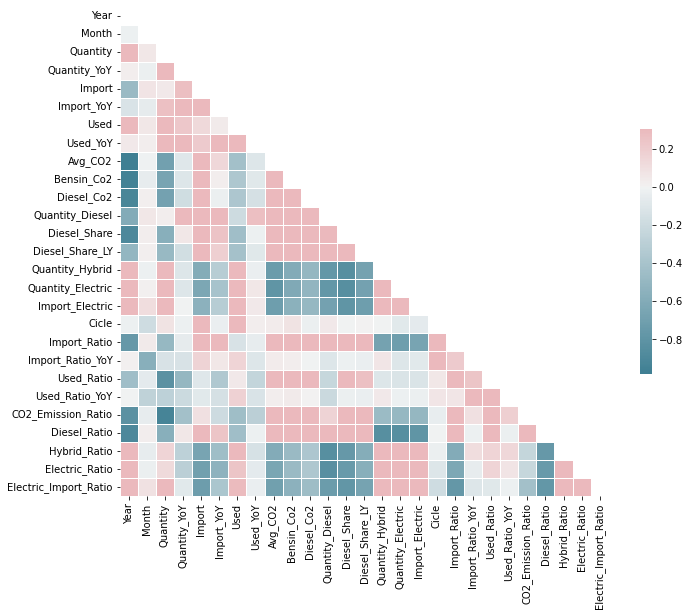

<IPython.core.display.Javascript object>

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr = df_month.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


In [19]:
df_month.corr()

,Year,Month,Quantity,Quantity_YoY,Import,Import_YoY,Used,Used_YoY,Avg_CO2,Bensin_Co2,...,Cicle,Import_Ratio,Import_Ratio_YoY,Used_Ratio,Used_Ratio_YoY,CO2_Emission_Ratio,Diesel_Ratio,Hybrid_Ratio,Electric_Ratio,Electric_Import_Ratio
Year,1.000000,-0.024584,0.653161,0.026438,-0.478087,-0.127942,0.385064,0.046504,-0.981360,-0.956025,...,-0.018977,-0.760396,0.008952,-0.442683,-0.003819,-0.818360,-0.898915,0.585263,0.598551,0.660971
Month,-0.024584,1.000000,0.057991,-0.026346,0.069854,-0.057451,0.053558,0.024815,-0.011634,-0.047163,...,-0.185619,0.038759,-0.569668,-0.068516,-0.273026,-0.053061,0.022780,-0.051071,-0.025499,0.086494
Quantity,0.653161,0.057991,1.000000,0.521696,0.046455,0.261060,0.476903,0.437380,-0.693300,-0.664581,...,0.079016,-0.492037,-0.138825,-0.819996,-0.277115,-0.937564,-0.572641,0.150052,0.120653,0.332003
Quantity_YoY,0.026438,-0.026346,0.521696,1.000000,0.265802,0.677884,0.222772,0.625542,-0.095796,-0.109533,...,-0.018747,-0.060156,-0.138291,-0.502993,-0.201551,-0.426795,0.056322,-0.280793,-0.295207,-0.077072
Import,-0.478087,0.069854,0.046455,0.265802,1.000000,0.530565,0.131738,0.212788,0.485179,0.389929,...,0.421137,0.835120,0.160651,-0.097436,-0.077835,0.097065,0.486935,-0.657894,-0.703657,-0.723279
Import_YoY,-0.127942,-0.057451,0.261060,0.677884,0.530565,1.000000,0.039464,0.404145,0.139627,0.020384,...,-0.031513,0.307798,0.051493,-0.360174,-0.148678,-0.192936,0.243986,-0.449081,-0.540310,-0.378486
Used,0.385064,0.053558,0.476903,0.222772,0.131738,0.039464,1.000000,0.359082,-0.426403,-0.362887,...,0.299820,-0.137900,0.151199,0.047851,0.165061,-0.449582,-0.438338,0.321622,0.244509,0.290073
Used_YoY,0.046504,0.024815,0.437380,0.625542,0.212788,0.404145,0.359082,1.000000,-0.100996,-0.091419,...,0.021285,-0.049101,-0.105753,-0.254953,-0.128128,-0.297595,-0.018044,-0.144177,-0.065021,-0.035460
Avg_CO2,-0.981360,-0.011634,-0.693300,-0.095796,0.485179,0.139627,-0.426403,-0.100996,1.000000,0.945226,...,0.030436,0.781661,0.034315,0.462870,0.022650,0.847317,0.913681,-0.605103,-0.643287,-0.705432
Bensin_Co2,-0.956025,-0.047163,-0.664581,-0.109533,0.389929,0.020384,-0.362887,-0.091419,0.945226,1.000000,...,0.083715,0.695794,0.025263,0.477684,0.039353,0.823941,0.802373,-0.480564,-0.477114,-0.550051


<IPython.core.display.Javascript object>

In [20]:
# calculate the correlation between columns
corr_matrix = df_month.corr()

# select the correlation of Quantity column
quantity_corr = corr_matrix['Quantity'].abs()

# sort the correlation values in descending order
quantity_corr.sort_values(ascending=False, inplace=True)

# print the sorted correlation values
print(quantity_corr)


Quantity                 1.000000
CO2_Emission_Ratio       0.937564
Used_Ratio               0.819996
Avg_CO2                  0.693300
Diesel_Co2               0.685538
Bensin_Co2               0.664581
Year                     0.653161
Diesel_Ratio             0.572641
Diesel_Share             0.571153
Quantity_YoY             0.521696
Import_Ratio             0.492037
Diesel_Share_LY          0.486683
Used                     0.476903
Used_YoY                 0.437380
Import_Electric          0.416476
Quantity_Electric        0.394345
Quantity_Hybrid          0.393684
Electric_Import_Ratio    0.332003
Used_Ratio_YoY           0.277115
Import_YoY               0.261060
Hybrid_Ratio             0.150052
Import_Ratio_YoY         0.138825
Electric_Ratio           0.120653
Cicle                    0.079016
Month                    0.057991
Import                   0.046455
Quantity_Diesel          0.028649
Name: Quantity, dtype: float64


<IPython.core.display.Javascript object>

The high correlation coefficients between the Quantity column and certain other columns in the dataset, such as CO2_Emission_Ratio, Used_Ratio, Avg_CO2, Diesel_Co2, Bensin_Co2 and Year indicate that there is a strong relationship between these columns and the number of units sold.

For example, a high correlation between Quantity and CO2_Emission_Ratio could indicate that as the average CO2 emissions per unit sold increase, the number of units sold decreases. This could be because of increasing environmental regulations and concerns, leading to a decrease in demand for higher emission vehicles.

A high correlation between Quantity and Used_Ratio could indicate that as the proportion of used cars in total sales increases, the number of units sold increases. This could be because used cars are generally cheaper than new cars, making them more accessible to a larger portion of the population.

A high correlation between Quantity and Avg_CO2 could indicate that as the average CO2 emissions of all cars sold in a given month decreases, the number of units sold increases. This could be because of increasing environmental regulations and concerns, leading to an increase in demand for lower emission vehicles.

A high correlation between Quantity and Year could indicate that as the years go by the number of units sold increases, this could be because of several reasons, such as population growth, increase in the number of people with access to credit, and increase in the number of people with driver licenses

In [21]:
import plotly.express as px

# Create scatter matrix plot
fig = px.scatter_matrix(df_month, dimensions=["Quantity","CO2_Emission_Ratio", "Used_Ratio", "Avg_CO2", "Diesel_Co2"], color="Quantity", title="Scatter matrix of Quantity and other features")
# Show plot
fig.show()


<IPython.core.display.Javascript object>

### Graph this relationships

In [22]:
fig = px.scatter(df_month, x='CO2_Emission_Ratio', y='Quantity')
fig.show()


<IPython.core.display.Javascript object>

In [23]:
fig = px.line(df_month, x='Year', y='Quantity')
fig.show()


<IPython.core.display.Javascript object>

In [24]:
fig = px.scatter(df_month, x='Diesel_Ratio', y='Quantity', color='Year')
fig.show()

<IPython.core.display.Javascript object>

In [25]:
fig = px.scatter(df_month, x='Diesel_Ratio', y='Quantity', color='Year')
fig.show()



<IPython.core.display.Javascript object>

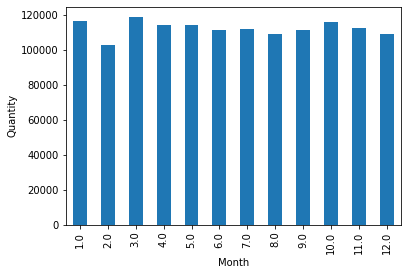

<IPython.core.display.Javascript object>

In [26]:
df_month.groupby('Month')['Quantity'].sum().plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Quantity')
plt.show()


## EDA

In [27]:
df_month

,Year,Month,Quantity,Quantity_YoY,Import,Import_YoY,Used,Used_YoY,Avg_CO2,Bensin_Co2,...,Cicle,Import_Ratio,Import_Ratio_YoY,Used_Ratio,Used_Ratio_YoY,CO2_Emission_Ratio,Diesel_Ratio,Hybrid_Ratio,Electric_Ratio,Electric_Import_Ratio
0,2007.0,1.0,12685.0,5227.0,2276.0,257.0,33125.0,3940.8,152.0,155.0,...,-0.866025,0.179425,NaN,2.611352,NaN,0.011983,0.794009,0.031912,0.019771,0.089895
1,2007.0,2.0,9793.0,2448.0,1992.0,-89.0,34102.2,1668.6,156.0,159.0,...,-0.499998,0.203411,0.133683,3.482304,0.333525,0.015930,0.737466,0.040131,0.041458,0.084739
2,2007.0,3.0,11264.0,1445.0,2626.0,45.0,36676.0,1632.4,159.0,161.0,...,0.000004,0.233132,0.146116,3.256037,-0.064976,0.014116,0.707120,0.032351,0.016246,0.064737
3,2007.0,4.0,8854.0,504.0,2220.0,-130.0,33520.0,216.0,160.0,165.0,...,0.500004,0.250734,0.075502,3.785859,0.162720,0.018071,0.690761,0.053129,0.030156,0.068559
4,2007.0,5.0,12007.0,1592.0,2881.0,7.0,38349.0,1903.2,160.0,163.0,...,0.866028,0.239943,-0.043037,3.193887,-0.156364,0.013326,0.709503,0.030316,0.015474,0.050469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,2016.0,9.0,13854.0,1433.0,1526.0,-373.0,42780.0,236.0,88.0,98.0,...,-0.000011,0.110149,-0.018527,3.087917,-0.041873,0.006352,0.277032,0.288076,0.189765,0.338794
117,2016.0,10.0,11932.0,-1265.0,1365.0,-443.0,39797.0,-1611.0,91.0,98.0,...,-0.500011,0.114398,0.038580,3.335317,0.080119,0.007627,0.297016,0.268941,0.155967,0.356044
118,2016.0,11.0,13194.0,594.0,1305.0,-233.0,39721.0,2246.0,88.0,100.0,...,-0.866032,0.098909,-0.135401,3.010535,-0.097377,0.006670,0.294983,0.241094,0.194558,0.384674
119,2016.0,12.0,13602.0,524.0,1137.0,-96.0,31761.0,-631.0,98.0,106.0,...,-1.000000,0.083591,-0.154870,2.335024,-0.224382,0.007205,0.355021,0.190928,0.170490,0.317502


<IPython.core.display.Javascript object>

In [28]:
df_month["Year"] = pd.to_numeric(df_month["Year"])
df_month["Year"] = df_month["Year"].astype(int)
df_month["Month"] = pd.to_numeric(df_month["Month"])
df_month["Month"] = df_month["Month"].astype(int)

<IPython.core.display.Javascript object>

In [29]:
df_month["Year"] = df_month["Year"].astype(str)
df_month["Month"] = df_month["Month"].astype(str)

df_month["Date"] = df_month["Year"].str.cat(
    df_month["Month"].str.zfill(2), sep="-"
)
df_month["Year"] = df_month["Year"].astype(int)
df_month["Month"] = df_month["Month"].astype(int)
df_month["Quantity"] = df_month["Quantity"].astype(int)

df_month.Date[:5]

0    2007-01
1    2007-02
2    2007-03
3    2007-04
4    2007-05
Name: Date, dtype: object

<IPython.core.display.Javascript object>

In [30]:
fig = px.bar(
    df_month,
    x="Date",
    y="Quantity",
    hover_data=["Year", "Month", "Quantity"],
    color="Quantity",
    text="Quantity",
    height=600,
    width=2400,
)
fig.update_traces(texttemplate="%{text:.2s}", textposition="outside")
fig.show()

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Year', ylabel='Month'>

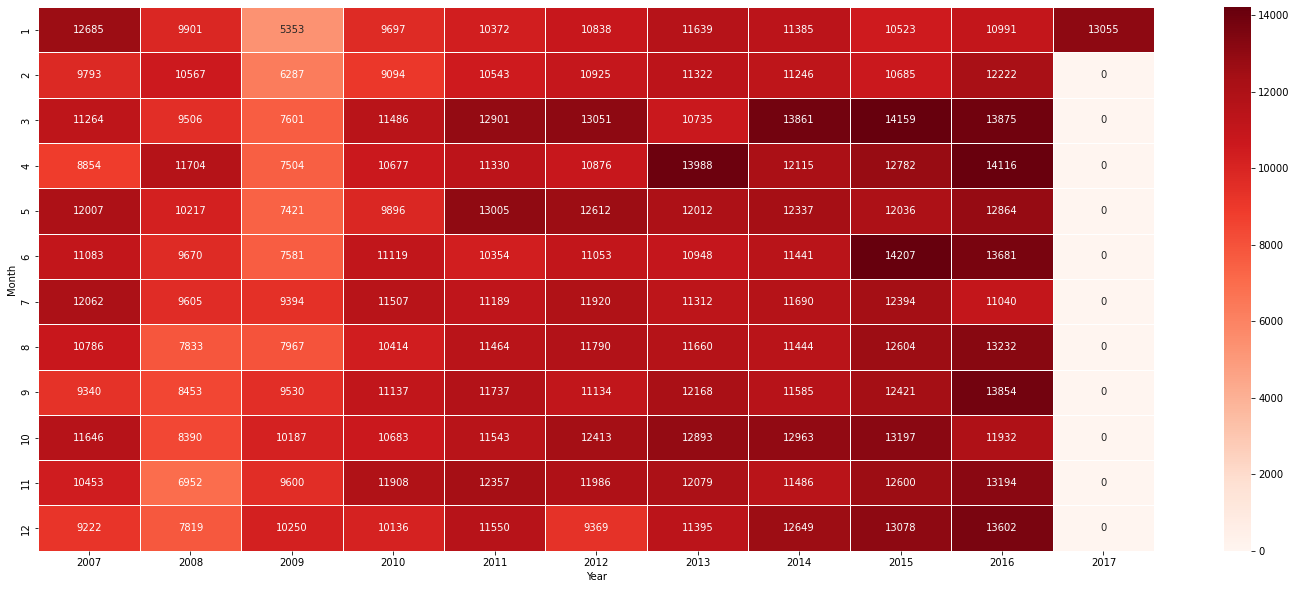

<IPython.core.display.Javascript object>

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

aux_csm = df_month[["Month", "Year", "Quantity"]]
plt.figure(figsize=(25, 10))
sns.heatmap(
    aux_csm.pivot("Month", "Year", "Quantity").fillna(0).astype(int),
    annot=True,
    fmt="d",
    linewidths=0.5,
    cmap="Reds",
)

In [32]:
import plotly.graph_objects as go


def plot_var_comp(df, column, title, xlabel, ylabel):
    df["d" + column] = df[column].diff()
    df["d2" + column] = df["d" + column].diff()

    # Create traces
    x = df.Date
    y = df[column]  # y
    dy = df["d" + column]  # dy'
    d2y = df["d2" + column]  # dy''
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=x, y=y, mode="lines", name=column))
    fig.add_trace(go.Scatter(x=x, y=dy, mode="lines", name=f"Increase of {column}"))
    fig.add_trace(go.Scatter(x=x, y=d2y, mode="lines", name="Increase's Acceleration"))
    fig.update_layout(
        title=title, xaxis_title=xlabel, yaxis_title=ylabel,
    )
    fig.show()


plot_var_comp(
    df_month,
    "Quantity",
    "Sales and your components",
    "Date",
    "Number of sales",
)

<IPython.core.display.Javascript object>

In [33]:


# Create scatter matrix plot
fig = px.scatter_matrix(df_month, dimensions=["Quantity", "Used", "Avg_CO2","Diesel_Co2","Bensin_Co2","Quantity_Diesel","Diesel_Share","Quantity_YoY","Import_Ratio"],
                        color="Quantity", title="Scatter matrix of Quantity and other features")

# Show plot
fig.show()


<IPython.core.display.Javascript object>

In [34]:
fig = px.scatter_3d(df_month, x='Year', y='Month', z='Avg_CO2', color='Quantity', size='Quantity', title="3D Scatter Plot of Quantity, Year, Month and AVG_CO2")

fig.show()

<IPython.core.display.Javascript object>

This code creates a 3D scatter plot that displays the relationship between 'Quantity', 'Year', 'Month' and 'Avg_CO2' in a three-dimensional space. It's a complex graph that can give a lot of insights about the data, also it's an elegant and professional way to show your analysis to other people.

You can see how the 'Quantity' changes based on the 'Year', 'Month' and 'Avg_CO2'. The graph shows how the 'Quantity' of sales changes over time, month to month, and how the AVG_CO2 changes with the Quantity. You can see how the Quantity of sales decrease over the years and how the AVG_CO2 increase over the years.

The graph shows that the 'Quantity' of sales is higher when the 'Avg_CO2' is lower, this indicates that the cars with lower CO2 emissions are more attractive to the consumers. Also, you can see that the 'Quantity' of sales is higher during the months of the year where the 'Avg_CO2' is lower, indicating that the customers are more willing to buy cars during the months where the 'Avg_CO2' is lower.

This graph can help you understand the relationship between 'Quantity', 'Year', 'Month', and 'Avg_CO2' in a more visual and interactive way. It can help you identify patterns and trends in the data that may not be as apparent in a table or a simple plot, and it can be used to support my analysis and predictions about the sales.

# Forecast

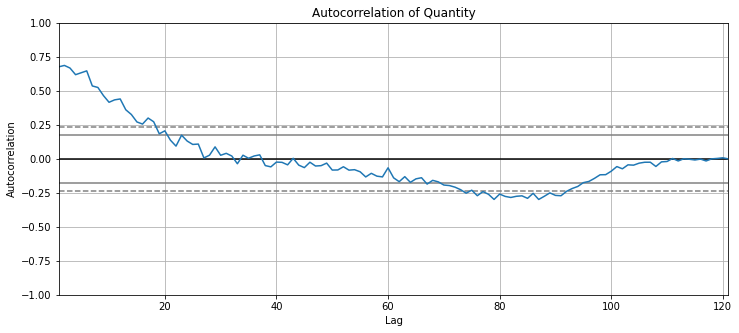

<IPython.core.display.Javascript object>

In [35]:
from pandas.plotting import autocorrelation_plot

plt.figure(figsize=(12, 5))
plt.title("Autocorrelation of Quantity")
ax = autocorrelation_plot(df_month["Quantity"])

In [36]:
fig = px.box(
    df_month,
    y="Quantity",
    facet_col="Year",
    color="Year",
    boxmode="overlay",
    points="all",
)

fig.show()

<IPython.core.display.Javascript object>

In [37]:
fig = go.Figure(data=go.Histogram(x=df_month['Quantity']))

fig.update_layout(title='Quantity Distribution', xaxis_title='Quantity', yaxis_title='Frequency')

fig.show()

<IPython.core.display.Javascript object>

In [38]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=df_month['Date'], y=df_month['Quantity'], name='Quantity'))
fig.add_trace(go.Scatter(x=df_month['Date'], y=df_month['Used'], name='Used'))


fig.update_layout(title='Trend Comparison', xaxis_title='Date', yaxis_title='Value')

fig.show()

<IPython.core.display.Javascript object>

In [39]:
from statsmodels.tsa.seasonal import seasonal_decompose

res = seasonal_decompose(df_month.Quantity, period=12)
df = {
    "observed": res.observed,
    "trend": res.trend,
    "seasonal": res.seasonal,
    "resid": res.resid,
}
res = pd.DataFrame(df)
res.head()

,observed,trend,seasonal,resid
0,12685.0,NaN,-946.376852,NaN
1,9793.0,NaN,-709.413889,NaN
2,11264.0,NaN,845.475000,NaN
3,8854.0,NaN,591.808333,NaN
4,12007.0,NaN,278.683333,NaN


<IPython.core.display.Javascript object>

In [40]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Defining variables
fig = make_subplots(shared_xaxes=True,rows=4, cols=1)
x = df_month.Date
y = res.observed
z =res.trend
k =res.seasonal
w =res.resid

# Ploting the lines
fig.append_trace(go.Scatter(
    x=x,
    y=y,
), row=1, col=1)

fig.append_trace(go.Scatter(
    x=x,
    y=z,
), row=2, col=1)

fig.append_trace(go.Scatter(
    x=x,
    y=k
), row=3, col=1)

fig.append_trace(go.Scatter(
    x=x,
    y=w
), row=4, col=1)

# Update properties and descriptions
fig.update_layout(height=700, width=1400, title_text="Statsmodel")
fig.update_xaxes(title_text="Date", row=4, col=1)
fig.update_yaxes(title_text="Observed", row=1, col=1)
fig.update_yaxes(title_text="Trend", row=2, col=1)
fig.update_yaxes(title_text="Seasonal", row=3, col=1)
fig.update_yaxes(title_text="Resid/Noise", row=4, col=1)
fig.show()

<IPython.core.display.Javascript object>

In [41]:
df_month["sma_Quantity"] = df_month.Quantity.rolling(10).mean()
plot_var_comp(
    df_month,
    "sma_Quantity",
    "Sales and your components with SMA",
    "Date",
    "SMA to Number of sales",
)

<IPython.core.display.Javascript object>

## prophet


In [42]:
!pip install --upgrade plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.2/15.2 MB 23.9 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: plotly
    Found existing installation: plotly 5.11.0
    Uninstalling plotly-5.11.0:
      Successfully uninstalled plotly-5.11.0


<IPython.core.display.Javascript object>

In [43]:
from prophet import Prophet
from joblib import Parallel, delayed
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


def format_to_prophet(serie_ds, serie_y):
    aux = pd.DataFrame()
    aux["ds"] = serie_ds
    aux["y"] = serie_y
    return aux


X = df_month.Date
Y = df_month.Quantity
prophet_data = format_to_prophet(X, Y)


def train_and_plot(cps, prophet_data, plot=False):
    model = Prophet(yearly_seasonality=True, changepoint_prior_scale=cps)
    model.fit(prophet_data)

    future = model.make_future_dataframe(periods=12, freq="M")
    forecast = model.predict(future)

    r2 = round(r2_score(prophet_data["y"], forecast["yhat"][:-12]), 3)
    mse = round(mean_squared_error(prophet_data["y"], forecast["yhat"][:-12]), 3)
    mae = round(mean_absolute_error(prophet_data["y"], forecast["yhat"][:-12]), 3)

    if plot:
        fig = go.Figure()
        fig.add_trace(
            go.Scatter(
                x=forecast["ds"],
                y=forecast["yhat"],
                mode="lines",
                name="Predict Values",
            )
        )
        fig.add_trace(
            go.Scatter(
                x=forecast["ds"], y=forecast["trend"], mode="lines", name="Trend"
            )
        )
        fig.add_trace(
            go.Scatter(
                x=prophet_data["ds"],
                y=prophet_data["y"],
                mode="lines",
                name="Real Values",
            )
        )
        fig.update_layout(
            title_text=f"Comperating the real x predicted for car sales",
            yaxis_title=f"Sales",
            xaxis_title="Date",
        )

        fig.show()
        print("R2: ", r2)
        print("MSE: ", mse)
        print("MAE: ", mae)
    else:
        return {"CPS": cps, "R2": r2, "MSE": mse, "MAE": mae}

<IPython.core.display.Javascript object>

In [44]:
df_month.tail(3)

,Year,Month,Quantity,Quantity_YoY,Import,Import_YoY,Used,Used_YoY,Avg_CO2,Bensin_Co2,...,Diesel_Ratio,Hybrid_Ratio,Electric_Ratio,Electric_Import_Ratio,Date,dQuantity,d2Quantity,sma_Quantity,dsma_Quantity,d2sma_Quantity
118,2016,11,13194,594.0,1305.0,-233.0,39721.0,2246.0,88.0,100.0,...,0.294983,0.241094,0.194558,0.384674,2016-11,1262.0,3184.0,13001.0,220.3,334.9
119,2016,12,13602,524.0,1137.0,-96.0,31761.0,-631.0,98.0,106.0,...,0.355021,0.190928,0.170490,0.317502,2016-12,408.0,-854.0,13139.0,138.0,-82.3
120,2017,1,13055,2064.0,1549.0,330.0,36078.0,4047.0,84.0,94.0,...,0.262964,0.338491,0.175795,0.318915,2017-01,-547.0,-955.0,13057.0,-82.0,-220.0


<IPython.core.display.Javascript object>

In [45]:
from joblib import Parallel, delayed

cps_options = [round(x, 1) for x in np.linspace(start=0.1, stop=10, num=100)]

results = Parallel(n_jobs=-1, verbose=10)(
    delayed(train_and_plot)(i, prophet_data) for i in cps_options
)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
17:53:43 - cmdstanpy - INFO - Chain [1] start processing
17:53:43 - cmdstanpy - INFO - Chain [1] start processing
17:53:43 - cmdstanpy - INFO - Chain [1] start processing
17:53:43 - cmdstanpy - INFO - Chain [1] start processing
17:53:43 - cmdstanpy - INFO - Chain [1] done processing
17:53:43 - cmdstanpy - INFO - Chain [1] done processing
17:53:43 - cmdstanpy - INFO - Chain [1] done processing
17:53:43 - cmdstanpy - INFO - Chain [1] done processing
17:53:45 - cmdstanpy - INFO - Chain [1] start processing
17:53:45 - cmdstanpy - INFO - Chain [1] start processing
17:53:45 - cmdstanpy - INFO - Chain [1] start processing
17:53:45 - cmdstanpy - INFO - Chain [1] done processing
17:53:45 - cmdstanpy - INFO - Chain [1] start processing
17:53:45 - cmdstanpy - INFO - Chain [1] done processing
17:53:45 - cmdstanpy - INFO - Chain [1] done processing
17:53:45 - cmdstanpy - INFO - Chain [1] done processing
[Parallel(n_jobs=-1)

<IPython.core.display.Javascript object>

In [46]:
results = pd.DataFrame(results)
results = results[results.R2.isin([max(results.R2)])]
results = results[results.MSE.isin([min(results.MSE)])]
results

,CPS,R2,MSE,MAE
98,9.9,0.827,526467.976,567.301


<IPython.core.display.Javascript object>

In [47]:
train_and_plot(results.CPS.iloc[0], prophet_data, True)

17:54:14 - cmdstanpy - INFO - Chain [1] start processing
17:54:14 - cmdstanpy - INFO - Chain [1] done processing


R2:  0.827
MSE:  526467.976
MAE:  567.301


<IPython.core.display.Javascript object>

### Train and test

In [48]:
cps = results.CPS.iloc[0]

<IPython.core.display.Javascript object>

In [49]:
model = Prophet(yearly_seasonality=True, changepoint_prior_scale=cps)
model.fit(prophet_data[:-12])

future = model.make_future_dataframe(periods=12, freq="M")
forecast = model.predict(future)


17:54:15 - cmdstanpy - INFO - Chain [1] start processing
17:54:15 - cmdstanpy - INFO - Chain [1] done processing


<IPython.core.display.Javascript object>

In [50]:
prophet = forecast['yhat'][-12:]
prophet

109    11600.944576
110    14502.802636
111    12160.660171
112    13434.854769
113    13346.862431
114    13127.649208
115    12917.398757
116    12535.945513
117    13474.407199
118    13455.211932
119    13044.127973
120    12084.266610
Name: yhat, dtype: float64

<IPython.core.display.Javascript object>

In [51]:
fig = go.Figure()
fig.add_trace(
    go.Scatter(
        x=forecast["ds"],
        y=forecast["yhat"],
        mode="lines",
        name="Predicted Values",
    )
)
fig.add_trace(
    go.Scatter(
        x=prophet_data["ds"],
        y=prophet_data["y"],
        mode="lines",
        name="Real Values",
    )
)
fig.update_layout(
    title_text=f"Comparing the real x predicted for car sales",
    yaxis_title=f"Sales",
    xaxis_title="Date",
)
fig.show()


<IPython.core.display.Javascript object>

In [72]:
prophet = forecast["yhat"][-12:]
prophet

109    11600.944576
110    14502.802636
111    12160.660171
112    13434.854769
113    13346.862431
114    13127.649208
115    12917.398757
116    12535.945513
117    13474.407199
118    13455.211932
119    13044.127973
120    12084.266610
Name: yhat, dtype: float64

<IPython.core.display.Javascript object>

In [53]:
r2_prophet = round(r2_score(prophet_data["y"][-12:], forecast["yhat"][-12:]), 3)
mse_prophet = round(mean_squared_error(prophet_data["y"][-12:], forecast["yhat"][-12:]), 3)
mae_prophet = round(mean_absolute_error(prophet_data["y"][-12:], forecast["yhat"][-12:]), 3)
print(r2_prophet,mse_prophet,mae_prophet)

-0.618 1244669.988 930.143


<IPython.core.display.Javascript object>

## ARIMA AND SARIMAX MODELS

In [54]:
pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 3.5 MB/s eta 0:00:00a 0:00:010m
Note: you may need to restart the kernel to use updated packages.


In [55]:
from pmdarima import auto_arima
import statsmodels.api as sm

<IPython.core.display.Javascript object>

In [56]:
train = prophet_data["y"][:-12]
test = prophet_data["y"][-12:]

<IPython.core.display.Javascript object>

In [57]:
def find_best_order(data):
    stepwise_fit = auto_arima(data, start_p=1, start_q=1,
                                 max_p=3, max_q=3, m=12,
                                 start_P=0, seasonal=True,
                                 d=None, max_D=2, trace=True,
                                 error_action='ignore',  # we don't want to know if an order does not work
                                 suppress_warnings=True,  # we don't want convergence warnings
                                 stepwise=True)  # set to stepwise

    best_order = stepwise_fit.order
    seasonal_order = stepwise_fit.seasonal_order
    return best_order, seasonal_order
def fit_model(train, order, seasonal_order=None):
    """
    Fits a SARIMAX model to the training data
    
    Parameters:
    - train (Pandas DataFrame): the training data
    - order (tuple): the order of the SARIMAX model, in the format (p,d,q)(P,D,Q,s)
    - seasonal_order (tuple): the seasonal order of the SARIMAX model, in the format (P,D,Q,s)
    - logged (bool): whether to fit the model on the log-transformed data
    
    Returns:
    - SARIMAXResults object: the results of the model fit
    - Pandas DataFrame: the residuals
    """
    
    
    model = sm.tsa.statespace.SARIMAX(train, trend='c', order=order, seasonal_order=seasonal_order)
    model_fit = model.fit()
    residuals = model_fit.resid
    return model_fit, residuals

def forecast_values(model_fit, test, logged=False):
    """
    Forecasts future values using the model fit
    
    Parameters:
    - model_fit (SARIMAXResults object): the fitted model
    - test (Pandas DataFrame): the test data
    - logged (bool): whether the data is log-transformed
    
    Returns:
    - Pandas DataFrame: the forecasted values with their confidence intervals
    """
    
    pred_uc = model_fit.get_forecast(len(test))
    pred_ci = pred_uc.conf_int()
    pred_uc.predicted_mean = (pred_uc.predicted_mean)
    pred_ci['predict'] =list((pred_uc.predicted_mean))
    if logged:
        pred_uc = model_fit.get_forecast(len(test))
        pred_ci = np.exp(pred_uc.conf_int())
        pred_uc.predicted_mean = (pred_uc.predicted_mean)
        pred_ci['predict'] =list(np.exp((pred_uc.predicted_mean)))
        
    return pred_ci

def plot_forecast(train, test,model_fit, pred_ci, steps=None):
    """
    Plots the forecasted values with their confidence intervals
    
    Parameters:
    - train (Pandas DataFrame): the training data
    - test (Pandas DataFrame): the test data
    - pred_ci (Pandas DataFrame): the forecasted values with their confidence intervals
    - steps (int): the number of steps to forecast
    - logged (bool): whether the data is log-transformed
    """
    
    pred_uc = model_fit.get_forecast(steps)
    ax = train.plot(label='Data', figsize=(14, 7))
    ax = test.plot(label='Test', figsize=(14, 7))
    pred_ci.predict.plot(ax=ax, label='Predicts')
    ax.fill_between(pred_ci.index,
                    pred_ci.iloc[:, 0],
                    pred_ci.iloc[:, 1], color='k', alpha=.25)
    ax.set_xlabel('Days')
    ax.set_ylabel('Price')
    plt.legend()
    plt.show()
    return pred_uc

def compare_forecast(predict, test):
    """
    Plots the forecasted values against the real values
    
    Parameters:
    - pred_ci (Pandas DataFrame): the forecasted values with their confidence intervals
    - test (Pandas DataFrame): the test data
    - logged (bool): whether the data is log-transformed
    """
    
    plt.figure(figsize=(16,9))
    plt.grid(True)
    plt.plot(predict, color = 'blue',marker = 'o',linestyle = 'dashed', label = 'Forecast')
    plt.plot(test, color = 'red', label = 'Precio real')
    plt.legend()
    plt.show()

<IPython.core.display.Javascript object>

In [58]:
best_order, seasonal_order = find_best_order(np.log(train))

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=-168.767, Time=0.66 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=-129.992, Time=0.04 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=-163.297, Time=0.32 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=-167.421, Time=0.37 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=-131.981, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=-168.009, Time=0.17 sec
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=-170.199, Time=1.24 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=-169.025, Time=0.59 sec
 ARIMA(1,1,1)(2,0,1)[12] intercept   : AIC=-168.330, Time=2.56 sec
 ARIMA(1,1,1)(1,0,2)[12] intercept   : AIC=-166.361, Time=2.66 sec
 ARIMA(1,1,1)(0,0,2)[12] intercept   : AIC=-166.961, Time=1.69 sec
 ARIMA(1,1,1)(2,0,0)[12] intercept   : AIC=-167.278, Time=1.64 sec
 ARIMA(1,1,1)(2,0,2)[12] intercept   : AIC=inf, Time=3.00 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=-165.485, Time=0.47 sec
 ARIMA(1,1,0)(1,0,1)[12]

<IPython.core.display.Javascript object>

In [59]:
model_fit , residuals = fit_model(np.log(train), best_order, seasonal_order)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -8.26772D-01    |proj g|=  3.08365D-01

At iterate    5    f= -8.27568D-01    |proj g|=  1.63882D-01


 This problem is unconstrained.



At iterate   10    f= -8.28979D-01    |proj g|=  2.10723D-02

At iterate   15    f= -8.29262D-01    |proj g|=  3.53765D-02

At iterate   20    f= -8.29826D-01    |proj g|=  2.77803D-01

At iterate   25    f= -8.36762D-01    |proj g|=  6.71499D-02

At iterate   30    f= -8.40236D-01    |proj g|=  1.54922D-01

At iterate   35    f= -8.47595D-01    |proj g|=  8.44935D-01

At iterate   40    f= -8.50337D-01    |proj g|=  2.38919D-02

At iterate   45    f= -8.50340D-01    |proj g|=  1.14125D-01

At iterate   50    f= -8.50361D-01    |proj g|=  5.66278D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     58   

/opt/conda/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



<IPython.core.display.Javascript object>

In [60]:
sarimax = forecast_values(model_fit, test, logged=True)
sarimax

,lower y,upper y,predict
109,9869.318867,14608.697996,12007.410160
110,10631.437034,15935.452694,13016.019435
111,9936.758479,15547.771257,12429.579553
112,9930.526884,16334.761456,12736.278411
113,9500.639686,16068.440932,12355.584471
114,9533.019138,16707.041718,12620.164359
115,9125.404479,16509.213087,12274.088441
116,9079.948536,16903.038005,12388.652678
117,9350.569654,17918.385590,12943.999094
118,8921.633040,17564.367538,12518.100565


<IPython.core.display.Javascript object>

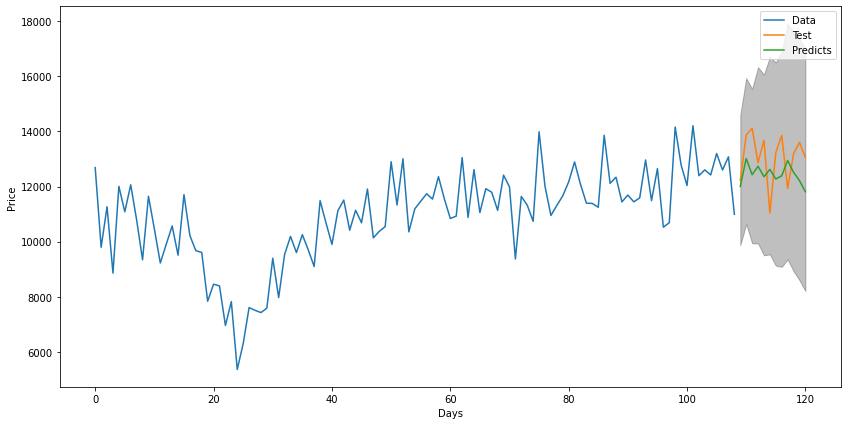

<IPython.core.display.Javascript object>

In [61]:
plot_forecast(train, test,model_fit,(sarimax), steps=len(test))

In [62]:
sarimax_pred = (sarimax.predict)
sarimax_pred

109    12007.410160
110    13016.019435
111    12429.579553
112    12736.278411
113    12355.584471
114    12620.164359
115    12274.088441
116    12388.652678
117    12943.999094
118    12518.100565
119    12214.548851
120    11808.986852
Name: predict, dtype: float64

<IPython.core.display.Javascript object>

In [63]:
r2_arima = round(r2_score(prophet_data["y"][-12:],sarimax_pred), 3)
mse_arima = round(mean_squared_error(prophet_data["y"][-12:], sarimax_pred), 3)
mae_arima = round(mean_absolute_error(prophet_data["y"][-12:], sarimax_pred), 3)
print(r2_arima,mse_arima,mae_arima)

-0.725 1326771.488 1044.826


<IPython.core.display.Javascript object>

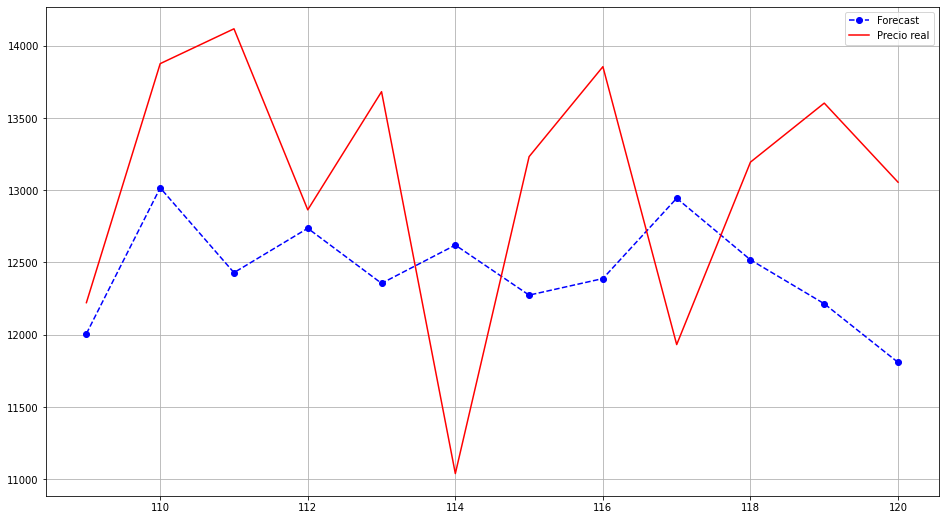

<IPython.core.display.Javascript object>

In [64]:
compare_forecast(sarimax_pred,test)

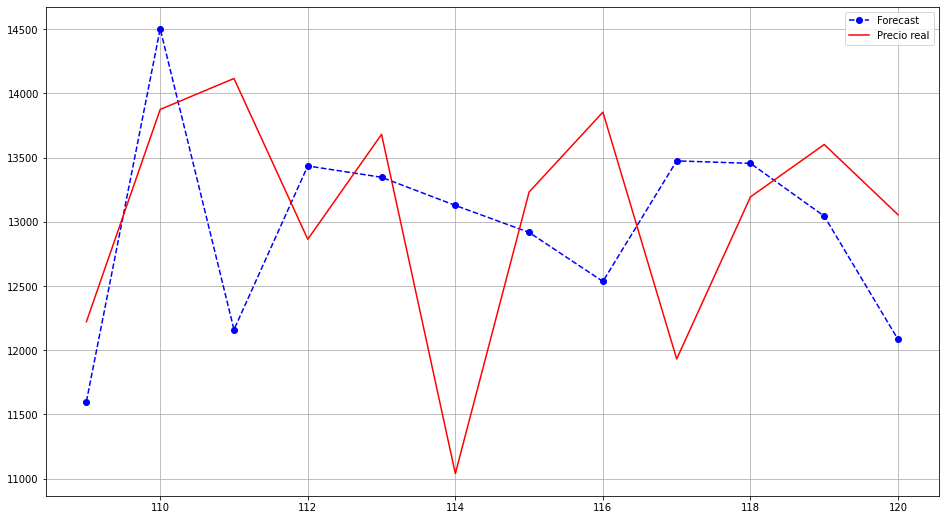

<IPython.core.display.Javascript object>

In [73]:
compare_forecast(prophet,test)

# Machine Learning

In [91]:
pip install pycaret --user

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.2/320.2 kB 1.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 15.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 27.3 MB/s eta 0:00:0000:01:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 33.1 MB/s eta 0:00:0000:01:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.0/17.0 MB 24.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.2/24.2 MB 19.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.1/167.1 kB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.7/147.7 kB 12.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.9/25.9 MB 18.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 636.6/636.6 kB 40.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 25.7 MB/s eta 0:00:0000:01

In [93]:
pip install markupsafe==2.0.1

Note: you may need to restart the kernel to use updated packages.


In [94]:
from pycaret.regression import setup, compare_models

<IPython.core.display.Javascript object>

In [68]:
df_month

,Year,Month,Quantity,Quantity_YoY,Import,Import_YoY,Used,Used_YoY,Avg_CO2,Bensin_Co2,...,Diesel_Ratio,Hybrid_Ratio,Electric_Ratio,Electric_Import_Ratio,Date,dQuantity,d2Quantity,sma_Quantity,dsma_Quantity,d2sma_Quantity
0,2007,1,12685,5227.0,2276.0,257.0,33125.0,3940.8,152.0,155.0,...,0.794009,0.031912,0.019771,0.089895,2007-01,NaN,NaN,NaN,NaN,NaN
1,2007,2,9793,2448.0,1992.0,-89.0,34102.2,1668.6,156.0,159.0,...,0.737466,0.040131,0.041458,0.084739,2007-02,-2892.0,NaN,NaN,NaN,NaN
2,2007,3,11264,1445.0,2626.0,45.0,36676.0,1632.4,159.0,161.0,...,0.707120,0.032351,0.016246,0.064737,2007-03,1471.0,4363.0,NaN,NaN,NaN
3,2007,4,8854,504.0,2220.0,-130.0,33520.0,216.0,160.0,165.0,...,0.690761,0.053129,0.030156,0.068559,2007-04,-2410.0,-3881.0,NaN,NaN,NaN
4,2007,5,12007,1592.0,2881.0,7.0,38349.0,1903.2,160.0,163.0,...,0.709503,0.030316,0.015474,0.050469,2007-05,3153.0,5563.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,2016,9,13854,1433.0,1526.0,-373.0,42780.0,236.0,88.0,98.0,...,0.277032,0.288076,0.189765,0.338794,2016-09,622.0,-1570.0,12895.3,125.4,121.9
117,2016,10,11932,-1265.0,1365.0,-443.0,39797.0,-1611.0,91.0,98.0,...,0.297016,0.268941,0.155967,0.356044,2016-10,-1922.0,-2544.0,12780.7,-114.6,-240.0
118,2016,11,13194,594.0,1305.0,-233.0,39721.0,2246.0,88.0,100.0,...,0.294983,0.241094,0.194558,0.384674,2016-11,1262.0,3184.0,13001.0,220.3,334.9
119,2016,12,13602,524.0,1137.0,-96.0,31761.0,-631.0,98.0,106.0,...,0.355021,0.190928,0.170490,0.317502,2016-12,408.0,-854.0,13139.0,138.0,-82.3


<IPython.core.display.Javascript object>

## Feature transformation

In [69]:
df_ml = df_month.copy()

<IPython.core.display.Javascript object>

In [70]:
# Create a new dataframe with the highly correlated features
columns_to_keep = quantity_corr[quantity_corr > 0.5].index
df_ml = df_month[columns_to_keep]
scaler = StandardScaler()
#df_ml[df_ml.columns] = scaler.fit_transform(df_ml[df_ml.columns])

df_ml.head(3)


,Quantity,CO2_Emission_Ratio,Used_Ratio,Avg_CO2,Diesel_Co2,Bensin_Co2,Year,Diesel_Ratio,Diesel_Share,Quantity_YoY
0,12685,0.011983,2.611352,152.0,152.0,155.0,2007,0.794009,79.4,5227.0
1,9793,0.015930,3.482304,156.0,155.0,159.0,2007,0.737466,73.7,2448.0
2,11264,0.014116,3.256037,159.0,158.0,161.0,2007,0.707120,70.7,1445.0


<IPython.core.display.Javascript object>

In [71]:
df_ml  = df_ml.drop(['sma_Quantity','dsma_Quantity'],axis = 1)

KeyError: "['sma_Quantity' 'dsma_Quantity'] not found in axis"

<IPython.core.display.Javascript object>

In [74]:
columns_to_keep = df_ml.columns
columns_to_keep

Index(['Quantity', 'CO2_Emission_Ratio', 'Used_Ratio', 'Avg_CO2', 'Diesel_Co2',
       'Bensin_Co2', 'Year', 'Diesel_Ratio', 'Diesel_Share', 'Quantity_YoY'],
      dtype='object')

<IPython.core.display.Javascript object>

## Target transformation

In [75]:
target = df_ml.Quantity

<IPython.core.display.Javascript object>

In [76]:
df_ml = df_ml.drop(['Quantity'],axis = 1)

<IPython.core.display.Javascript object>

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



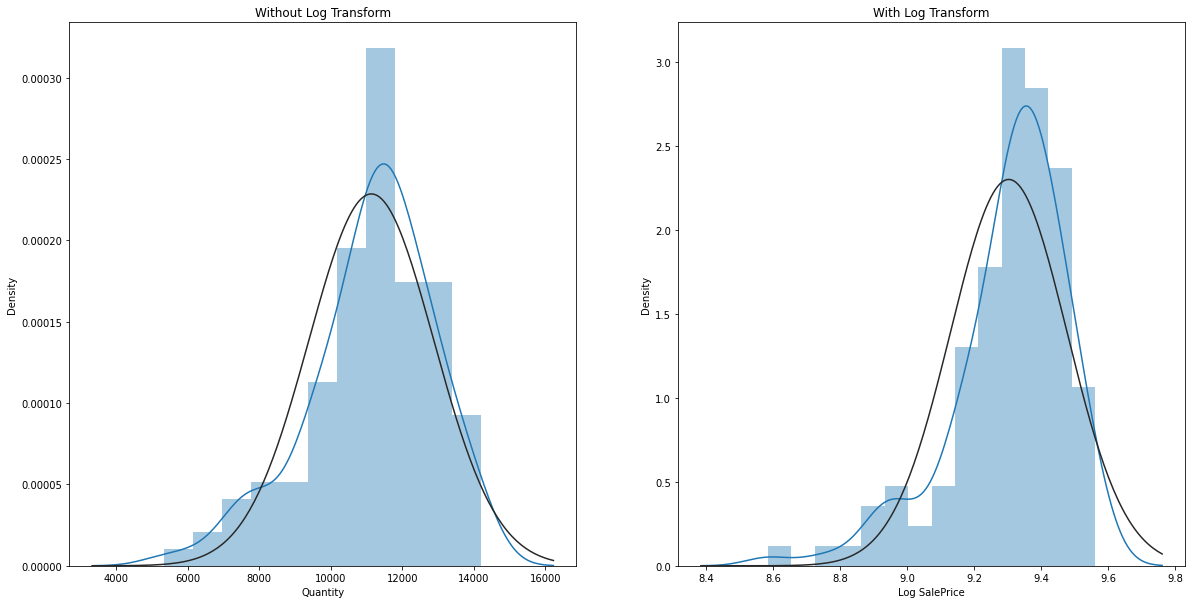

<IPython.core.display.Javascript object>

In [77]:
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
sns.distplot(target, kde=True, fit=scipy.stats.norm)
plt.title("Without Log Transform")

plt.subplot(1, 2, 2)
sns.distplot(np.log(target), kde=True, fit=scipy.stats.norm)
plt.xlabel("Log SalePrice")
plt.title("With Log Transform")

plt.show()

In [78]:
log_target = np.log(target)

<IPython.core.display.Javascript object>

## Scaling

In [79]:
skew_df = pd.DataFrame(df_ml.select_dtypes(np.number).columns, columns=['Feature'])
skew_df['Skew'] = skew_df['Feature'].apply(lambda feature: scipy.stats.skew(df_ml[feature]))
skew_df['Absolute Skew'] = skew_df['Skew'].apply(abs)
skew_df['Skewed'] = skew_df['Absolute Skew'].apply(lambda x: True if x >= 0.5 else False)
skew_df

,Feature,Skew,Absolute Skew,Skewed
0,CO2_Emission_Ratio,1.034882,1.034882,True
1,Used_Ratio,2.009403,2.009403,True
2,Avg_CO2,-0.264013,0.264013,False
3,Diesel_Co2,0.629231,0.629231,True
4,Bensin_Co2,0.252789,0.252789,False
5,Year,0.009209,0.009209,False
6,Diesel_Ratio,-0.616667,0.616667,True
7,Diesel_Share,-0.615564,0.615564,True
8,Quantity_YoY,-0.307502,0.307502,False


<IPython.core.display.Javascript object>

In [80]:
for column in skew_df.query("Skewed == True")['Feature'].values:
    df_ml[column] = np.log1p(df_ml[column])

<IPython.core.display.Javascript object>

In [81]:
scaled_data = df_ml.copy()

<IPython.core.display.Javascript object>

In [82]:
scaler = StandardScaler()
scaler.fit(scaled_data)

scaled_data = pd.DataFrame(scaler.transform(scaled_data), index=scaled_data.index, columns=scaled_data.columns)
scaled_data

,CO2_Emission_Ratio,Used_Ratio,Avg_CO2,Diesel_Co2,Bensin_Co2,Year,Diesel_Ratio,Diesel_Share,Quantity_YoY
0,-0.060569,-1.349953,0.993550,1.003214,1.249128,-1.565561,1.140795,1.042780,2.712717
1,0.891925,0.412076,1.170344,1.264263,1.484098,-1.565561,0.826371,0.793116,1.153347
2,0.454644,-0.010366,1.302939,1.520340,1.601583,-1.565561,0.653380,0.653948,0.590537
3,1.407079,0.946492,1.347138,1.520340,1.836553,-1.565561,0.558843,0.577324,0.062517
4,0.263911,-0.130337,1.347138,1.604626,1.719068,-1.565561,0.667074,0.668124,0.673022
...,...,...,...,...,...,...,...,...,...
116,-1.425794,-0.339056,-1.835146,-1.290610,-2.099195,1.534250,-2.196497,-2.454696,0.583803
117,-1.116087,0.140153,-1.702551,-1.395230,-2.099195,1.534250,-2.044042,-2.225975,-0.930116
118,-1.348551,-0.494914,-1.835146,-1.290610,-1.981710,1.534250,-2.059450,-2.248167,0.113018
119,-1.218517,-1.999147,-1.393162,-0.481727,-1.629255,1.534250,-1.614496,-1.638434,0.073739


<IPython.core.display.Javascript object>

## Split test and training

In [83]:
train_ml  = scaled_data[:-12]
test_ml  = scaled_data[-12:]
target_train = target[:-12]
target_test =  target[-12:]
log_target_train = log_target[:-12]
log_target_test =  log_target[-12:]


<IPython.core.display.Javascript object>

In [84]:
log_target_train

0      9.448175
1      9.189423
2      9.329367
3      9.088625
4      9.393245
         ...   
104    9.427144
105    9.487745
106    9.441452
107    9.478687
108    9.304832
Name: Quantity, Length: 109, dtype: float64

<IPython.core.display.Javascript object>

In [ ]:
#_ = setup(data=pd.concat([train_ml, log_target_train], axis=1), target='Quantity')

In [ ]:
#compare_models()

In [88]:
from sklearn.linear_model import HuberRegressor, LinearRegression, BayesianRidge, Ridge
from sklearn.ensemble import ExtraTreesRegressor, GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import LassoLars, LassoLarsIC
import xgboost as xgb


<IPython.core.display.Javascript object>

In [95]:
models = {
    "huber": HuberRegressor(),
    "lr": LinearRegression(),
    "br": BayesianRidge(),
    "et": ExtraTreesRegressor(),
    "ridge": Ridge(),
    "lar": LassoLars(),
    "gbr": GradientBoostingRegressor(),
    "rf": RandomForestRegressor(),
    "xgboost": xgb.XGBRegressor()
}


<IPython.core.display.Javascript object>

In [137]:
for name, model in models.items():
    model.fit(train_ml, log_target_train)
    print(name + " trained.")

huber trained.
lr trained.
br trained.
et trained.
ridge trained.
lar trained.
gbr trained.
rf trained.
xgboost trained.


<IPython.core.display.Javascript object>

In [138]:
results = {}

kf = KFold(n_splits=10)

for name, model in models.items():
    result = np.exp(np.sqrt(-cross_val_score(model, train_ml, log_target_train, scoring='neg_mean_squared_error', cv=kf)))
    results[name] = result

<IPython.core.display.Javascript object>

In [139]:
for name, result in results.items():
    print("----------\n" + name)
    print(np.mean(result))
    print(np.std(result))

----------
huber
1.0395971119725764
0.03758553406546909
----------
lr
1.0423495010578585
0.0355489957436556
----------
br
1.0419254189743323
0.03453097936001255
----------
et
1.0545088116346113
0.04056219959325904
----------
ridge
1.0387747528950773
0.018856557518763615
----------
lar
1.1761480473549752
0.12684379937064955
----------
gbr
1.0695986086510971
0.03532256682622546
----------
rf
1.0671087711690226
0.04081074739957911
----------
xgboost
1.0658255718754746
0.03455252234656767


<IPython.core.display.Javascript object>

In [141]:
final_predictions = (
    0.4 * np.exp(models['huber'].predict(test_ml)) +
    0.2 * np.exp(models['br'].predict(test_ml)) +
    0.2 * np.exp(models['lr'].predict(test_ml)) +
    0.1 * np.exp(models['ridge'].predict(test_ml)) +
    0.1 * np.exp(models['et'].predict(test_ml))
)

<IPython.core.display.Javascript object>

In [142]:
final_predictions

array([12537.65100499, 13325.98039112, 13543.5885289 , 12975.52815964,
       13234.72006577, 11855.18306217, 13189.76237545, 13343.65248005,
       12344.52551927, 13056.1496442 , 12994.76500435, 13221.02600394])

<IPython.core.display.Javascript object>

In [101]:
final = np.array(target_test)

<IPython.core.display.Javascript object>

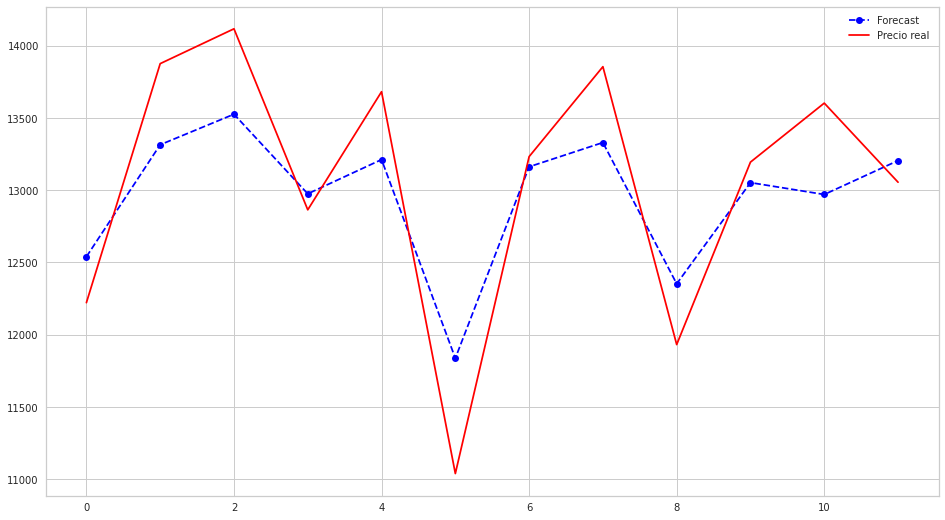

<IPython.core.display.Javascript object>

In [102]:
compare_forecast(final_predictions, final)

## Shift and predict

In [103]:
target_shift = target.shift(-3).dropna().reset_index()

<IPython.core.display.Javascript object>

In [104]:
target_test

109    12222
110    13875
111    14116
112    12864
113    13681
114    11040
115    13232
116    13854
117    11932
118    13194
119    13602
120    13055
Name: Quantity, dtype: int64

<IPython.core.display.Javascript object>

In [105]:
target_shift_train = target_shift[0:109].Quantity
target_shift_train

0       8854.0
1      12007.0
2      11083.0
3      12062.0
4      10786.0
5       9340.0
6      11646.0
7      10453.0
8       9222.0
9       9901.0
10     10567.0
11      9506.0
12     11704.0
13     10217.0
14      9670.0
15      9605.0
16      7833.0
17      8453.0
18      8390.0
19      6952.0
20      7819.0
21      5353.0
22      6287.0
23      7601.0
24      7504.0
25      7421.0
26      7581.0
27      9394.0
28      7967.0
29      9530.0
30     10187.0
31      9600.0
32     10250.0
33      9697.0
34      9094.0
35     11486.0
36     10677.0
37      9896.0
38     11119.0
39     11507.0
40     10414.0
41     11137.0
42     10683.0
43     11908.0
44     10136.0
45     10372.0
46     10543.0
47     12901.0
48     11330.0
49     13005.0
50     10354.0
51     11189.0
52     11464.0
53     11737.0
54     11543.0
55     12357.0
56     11550.0
57     10838.0
58     10925.0
59     13051.0
60     10876.0
61     12612.0
62     11053.0
63     11920.0
64     11790.0
65     11134.0
66     124

<IPython.core.display.Javascript object>

In [167]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grids for each model
param_grid_huber = {'alpha': [0.1, 1, 10], 'epsilon': [1.35, 1.5, 1.75]}
param_grid_linear = {'normalize': [True, False]}
param_grid_bayesian = {'n_iter': [300, 500, 1000], 'tol': [1e-3, 1e-4, 1e-5]}
param_grid_ridge = {'alpha': [0.1, 1, 10], 'normalize': [True, False]}
param_grid_extratrees = {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 10]}
param_grid_gradientboosting = {'n_estimators': [50, 100, 200], 'learning_rate': [0.1, 0.5, 1]}
param_grid_randomforest = {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 10]}
param_grid_lassolars = {'alpha': [0.1, 1, 10]}
param_grid_lassolarsic = {'criterion': ['bic', 'aic']}
param_grid_xgb = {'max_depth': [3, 5, 10], 'learning_rate': [0.1, 0.5, 1]}

# Create an instance of each model
huber = HuberRegressor()
linear = LinearRegression()
bayesian = BayesianRidge()
ridge = Ridge()
extratrees = ExtraTreesRegressor()
gradientboosting = GradientBoostingRegressor()
randomforest = RandomForestRegressor()
lassolars = LassoLars()
lassolarsic = LassoLarsIC()
xgb = xgb.XGBRegressor()

# Create the grid search objects
grid_huber = GridSearchCV(huber, param_grid_huber, cv=5)
grid_linear = GridSearchCV(linear, param_grid_linear, cv=5)
grid_bayesian = GridSearchCV(bayesian, param_grid_bayesian, cv=5)
grid_ridge = GridSearchCV(ridge, param_grid_ridge, cv=5)
grid_randomforest = GridSearchCV(randomforest, param_grid_randomforest, cv=5)
grid_lassolars = GridSearchCV(lassolars, param_grid_lassolars, cv=5)
grid_lassolarsic = GridSearchCV(lassolarsic, param_grid_lassolarsic, cv=5)
grid_xgb = GridSearchCV(xgb, param_grid_xgb, cv=5)


<IPython.core.display.Javascript object>

In [172]:
grid_extratrees = GridSearchCV(extratrees, param_grid_extratrees, cv=5)
grid_gradientboosting = GridSearchCV(gradientboosting, param_grid_gradientboosting, cv=5)

<IPython.core.display.Javascript object>

In [173]:
# Fit the grid search objects to the data
grid_huber.fit(train_ml, np.log(target_shift_train))
grid_linear.fit(train_ml, np.log(target_shift_train))
grid_bayesian.fit(train_ml,np.log(target_shift_train))
grid_ridge.fit(train_ml, np.log(target_shift_train))
grid_extratrees.fit(train_ml, np.log(target_shift_train))
grid_gradientboosting.fit(train_ml, np.log(target_shift_train))
grid_randomforest.fit(train_ml, np.log(target_shift_train))
grid_lassolars.fit(train_ml, np.log(target_shift_train))
grid_lassolarsic.fit(train_ml, np.log(target_shift_train))
grid_xgb.fit(train_ml, np.log(target_shift_train))

# Print the best hyperparameters for each model
print("Huber: ", grid_huber.best_params_)
print("Linear: ", grid_linear.best_params_)
print("Bayesian: ", grid_bayesian.best_params_)
print("Ridge: ", grid_ridge.best_params_)
print("ExtraTrees: ", grid_extratrees.best_params_)
print("GradientBoosting: ", grid_gradientboosting.best_params_)
print("RandomForest: ", grid_randomforest.best_params_)
print("LassoLars: ", grid_lassolars.best_params_)
print("LassoLarsIC: ", grid_lassolarsic.best_params_)
print("XGBoost: ", grid_xgb.best_params_)

Huber:  {'alpha': 10, 'epsilon': 1.75}
Linear:  {'normalize': True}
Bayesian:  {'n_iter': 300, 'tol': 1e-05}
Ridge:  {'alpha': 10, 'normalize': False}
ExtraTrees:  {'max_depth': 5, 'n_estimators': 50}
GradientBoosting:  {'learning_rate': 0.1, 'n_estimators': 50}
RandomForest:  {'max_depth': 10, 'n_estimators': 50}
LassoLars:  {'alpha': 0.1}
LassoLarsIC:  {'criterion': 'bic'}
XGBoost:  {'learning_rate': 0.1, 'max_depth': 3}


<IPython.core.display.Javascript object>

In [179]:
models = {
    "huber": HuberRegressor(),
    "lr": LinearRegression(),
    "br": BayesianRidge(),
    "et": ExtraTreesRegressor(),
    "ridge": Ridge(),
    "lar": LassoLars(),
    "gbr": GradientBoostingRegressor(),
    "rf": RandomForestRegressor(),
    
}

models['huber'].set_params(**grid_huber.best_params_)
models['lr'].set_params(**grid_linear.best_params_)
models['br'].set_params(**grid_bayesian.best_params_)
models['et'].set_params(**grid_extratrees.best_params_)
models['ridge'].set_params(**grid_ridge.best_params_)
models['lar'].set_params(**grid_lassolars.best_params_)
models['gbr'].set_params(**grid_gradientboosting.best_params_)
models['rf'].set_params(**grid_randomforest.best_params_)


RandomForestRegressor(max_depth=10, n_estimators=50)

<IPython.core.display.Javascript object>

In [180]:
for name, model in models.items():
    model.fit(train_ml, np.log(target_shift_train))
    print(name + " trained.")

huber trained.
lr trained.
br trained.
et trained.
ridge trained.
lar trained.
gbr trained.
rf trained.


<IPython.core.display.Javascript object>

In [181]:
results = {}

kf = KFold(n_splits=10)

for name, model in models.items():
    result = np.exp(np.sqrt(-cross_val_score(model, train_ml, np.log(target_shift_train), scoring='neg_mean_squared_error', cv=kf)))
    results[name] = result

<IPython.core.display.Javascript object>

In [182]:
for name, result in results.items():
    print("----------\n" + name)
    print(np.mean(result))
    print(np.std(result))

----------
huber
1.1196816595737225
0.06258106833256549
----------
lr
1.1365920435439818
0.06986371393806236
----------
br
1.1171510500229083
0.05573292175120609
----------
et
1.1102831003878155
0.051127941080314876
----------
ridge
1.1156677219903826
0.05353605966437466
----------
lar
1.182965775207864
0.10926459350815457
----------
gbr
1.1224958915159575
0.06081907872148019
----------
rf
1.1196384014130576
0.062398668504399755


<IPython.core.display.Javascript object>

In [183]:
final_predictions1 = (
    0.4 * np.exp(models['huber'].predict(test_ml)) +
    0.2 * np.exp(models['br'].predict(test_ml)) +
    0.2 * np.exp(models['lr'].predict(test_ml)) +
    0.1 * np.exp(models['ridge'].predict(test_ml)) +
    0.1 * np.exp(models['et'].predict(test_ml))
)

<IPython.core.display.Javascript object>

In [184]:
final_predictions1

array([12876.35379346, 12829.05608948, 13021.36117823, 12744.35445294,
       12373.74029932, 11772.74322737, 12465.54528173, 12665.09912358,
       12041.42573639, 12581.53304883, 12765.7962028 , 13433.25192469])

<IPython.core.display.Javascript object>

In [117]:
sarimax_pred

109    12007.410160
110    13016.019435
111    12429.579553
112    12736.278411
113    12355.584471
114    12620.164359
115    12274.088441
116    12388.652678
117    12943.999094
118    12518.100565
119    12214.548851
120    11808.986852
Name: predict, dtype: float64

<IPython.core.display.Javascript object>

In [186]:
data = pd.DataFrame()
data['Real'] = target_test
data['Ml'] = final_predictions1.round(1)
data['Sarimax'] = np.array(sarimax_pred).round(1)
data['Prophet'] = np.array(prophet).round(1)
data

,Real,Ml,Sarimax,Prophet
109,12222,12876.4,12007.4,11600.9
110,13875,12829.1,13016.0,14502.8
111,14116,13021.4,12429.6,12160.7
112,12864,12744.4,12736.3,13434.9
113,13681,12373.7,12355.6,13346.9
114,11040,11772.7,12620.2,13127.6
115,13232,12465.5,12274.1,12917.4
116,13854,12665.1,12388.7,12535.9
117,11932,12041.4,12944.0,13474.4
118,13194,12581.5,12518.1,13455.2


<IPython.core.display.Javascript object>

In [185]:
combine = (0.4*sarimax_pred+0.4*prophet+0.2*final_predictions1)
combine

109    12018.612653
110    13573.340046
111    12440.368125
112    13017.324163
113    12755.726821
114    12653.674072
115    12569.703935
116    12502.859101
117    12975.647664
118    12905.631609
119    12656.629970
120    12243.951770
dtype: float64

<IPython.core.display.Javascript object>

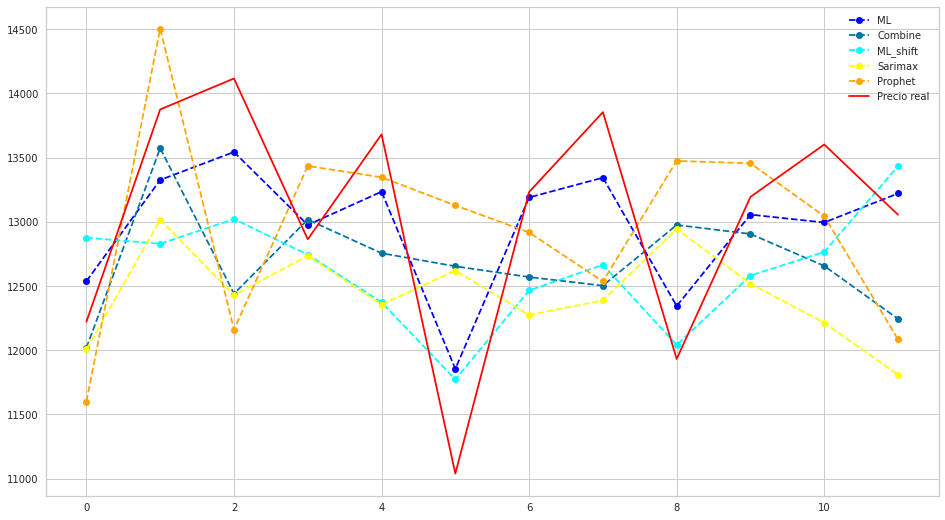

<IPython.core.display.Javascript object>

In [187]:
plt.figure(figsize=(16,9))
plt.grid(True)
plt.plot(np.array(final_predictions), color = 'blue',marker = 'o',linestyle = 'dashed', label = 'ML')
plt.plot(np.array(combine),marker = 'o',linestyle = 'dashed', label = 'Combine')
plt.plot(np.array(final_predictions1), color = 'cyan',marker = 'o',linestyle = 'dashed', label = 'ML_shift')
plt.plot(np.array(sarimax_pred), color = 'yellow',marker = 'o',linestyle = 'dashed', label = 'Sarimax')
plt.plot(np.array(prophet), color = 'orange',marker = 'o',linestyle = 'dashed', label = 'Prophet')
plt.plot(np.array(target_test), color = 'red', label = 'Precio real')
plt.legend()
plt.show()

In [189]:
df = pd.DataFrame(data)

<IPython.core.display.Javascript object>

In [190]:
df['combine'] = combine

<IPython.core.display.Javascript object>

In [191]:
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

mse = {}
r2 = {}
mae = {}
for column in df.columns:
    mse[column] = mean_squared_error(df['Real'], df[column])
    r2[column] = r2_score(df['Real'], df[column])
    mae[column] = mean_absolute_error(df['Real'], df[column])
print("Mean Absolute Error:")
print(mae)
print("Root Mean Squared Error:")
print(mse)
print("R-squared:")
print(r2)


Mean Absolute Error:
{'Real': 0.0, 'Ml': 737.1916666666666, 'Sarimax': 1044.825, 'Prophet': 930.1416666666668, 'combine': 831.2351557074231}
Root Mean Squared Error:
{'Real': 0.0, 'Ml': 684246.1224999999, 'Sarimax': 1326769.7641666664, 'Prophet': 1244651.1991666665, 'combine': 950982.3660323629}
R-squared:
{'Real': 1.0, 'Ml': 0.11040368311502557, 'Sarimax': -0.7249487527158223, 'Prophet': -0.6181854542918999, 'combine': -0.23638319959196963}


<IPython.core.display.Javascript object>